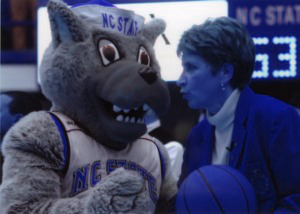

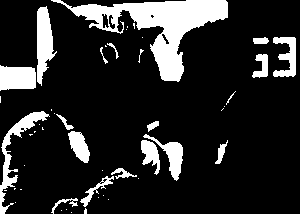

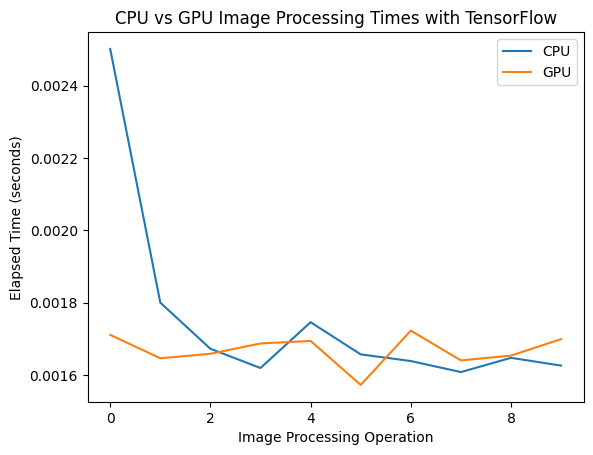

In [20]:
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # برای نمایش تصویر

# تصویر را بارگذاری می کنیم
img = io.imread('https://iiif.lib.ncsu.edu/iiif/0016007/full/300,/0/default.jpg')

# تصویر را به یک تانسور تنسورفلوو تبدیل می کنیم
img_tensor = tf.convert_to_tensor(img)

# تانسور را به حافظه جی پی یو منتقل کنید
with tf.device('/gpu:0'):
    img_tensor_gpu = tf.identity(img_tensor)

#زمان های اجرا را برای عملیات های مختلف پردازش تصویر در سی پی یو و جی پی یو ثبت می کنیم
cpu_execution_times = []
gpu_execution_times = []
for i in range(10):

#زمان شروع پردازش سی پی یو را ثبت می کنیم
    cpu_start_time = time.time()

#پردازش تصویر را روی سی پی یو انجام می دهیم
    gray_tensor = tf.image.rgb_to_grayscale(img_tensor)
    thresholded_tensor = tf.where(gray_tensor > 127, 255, 0)

#زمان پایان پردازش سی پی یو را ثبت می کنیم
    cpu_end_time = time.time()

#زمان سپری شده برای پردازش سی پی یو را محاسبه می کنیم
    cpu_elapsed_time = cpu_end_time - cpu_start_time
    cpu_execution_times.append(cpu_elapsed_time)

#زمان شروع پردازش جی پی یو را ثبت می کنیم
    with tf.device('/gpu:0'):
        gpu_start_time = time.time()

#پردازش تصویر را روی جی پی یو انجام می دهیم
        gray_tensor_gpu = tf.image.rgb_to_grayscale(img_tensor_gpu)
        thresholded_tensor_gpu = tf.where(gray_tensor_gpu > 127, 255, 0)

#زمان پایان پردازش جی پی یو را ثبت می کنیم
        gpu_end_time = time.time()

#زمان سپری شده برای پردازش جی پی یو را محاسبه می کنیم
    gpu_elapsed_time = gpu_end_time - gpu_start_time
    gpu_execution_times.append(gpu_elapsed_time)

#تانسور آستانه ای را به حافظه سی پی یو برمی گردانیم
thresholded_tensor = thresholded_tensor_gpu.numpy()

#نمایش تصاویر اصلی و پردازش شده
cv2_imshow(img)
cv2_imshow(thresholded_tensor)
cv2.waitKey(0)
cv2.destroyAllWindows()

#زمان های اجرا را رسم می کنیم
plt.plot(range(10), cpu_execution_times, label='CPU')
plt.plot(range(10), gpu_execution_times, label='GPU')
plt.xlabel('Image Processing Operation')
plt.ylabel('Elapsed Time (seconds)')
plt.title('CPU vs GPU Image Processing Times with TensorFlow')
plt.legend()
plt.show()
